In [ ]:
# Comprehensive solution for uniform subplot spacing
def create_perfectly_uniform_subplots(images_for_figure, nrows=2, ncols=2):
    """
    Create subplots with perfectly uniform spacing.
    This addresses common issues that cause uneven spacing.
    """
    img_w, img_h = images_for_figure[0].size
    
    # Calculate figure size maintaining aspect ratio
    figsize = (12, 12 * (img_h / img_w))
    
    # Create subplots with equal aspect ratio
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
    # Ensure axes is always iterable
    if nrows * ncols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    # Display images
    for ax, img in zip(axes, images_for_figure):
        ax.imshow(img)
        ax.axis('off')
        # Remove any padding around individual subplots
        ax.set_aspect('equal')
    
    # Set uniform spacing - these are RELATIVE values
    # wspace: horizontal spacing as fraction of subplot width
    # hspace: vertical spacing as fraction of subplot height
    fig.subplots_adjust(
        left=0.05,      # Left margin
        right=0.95,     # Right margin  
        top=0.95,       # Top margin
        bottom=0.05,    # Bottom margin
        wspace=0.1,     # 10% of subplot width between columns
        hspace=0.1      # 10% of subplot height between rows
    )
    
    # Alternative: Use constrained layout for automatic uniform spacing
    # fig.set_constrained_layout(True)  # Uncomment this line instead of subplots_adjust
    
    plt.show()
    return fig

# Test with your images
# create_perfectly_uniform_subplots(images_for_figure)

print("Use create_perfectly_uniform_subplots(images_for_figure) for perfectly uniform spacing!")


In [ ]:
# Solution for constrained layout spacing issues
def create_uniform_constrained_subplots(images_for_figure, nrows=2, ncols=2):
    """
    Create subplots with constrained layout that ensures uniform spacing.
    Addresses common issues that cause uneven spacing even with constrained layout.
    """
    # Calculate figure size
    img_w, img_h = images_for_figure[0].size
    figsize = (10, 10 * (img_h / img_w))
    
    # Create subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
    # Flatten axes for iteration
    if nrows * ncols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    # Display images with consistent settings
    for ax, img in zip(axes, images_for_figure):
        # Force equal aspect ratio to prevent spacing issues
        ax.imshow(img, aspect='equal')
        ax.axis('off')
        # Remove any padding that might affect spacing
        ax.set_xlim(0, img.shape[1])
        ax.set_ylim(img.shape[0], 0)
    
    # Enable constrained layout
    fig.set_constrained_layout(True)
    
    # Optional: Adjust constrained layout parameters
    # fig.set_constrained_layout_pads(w_pad=0.1, h_pad=0.1)
    
    plt.show()
    return fig

# Alternative: Manual spacing with constrained layout disabled
def create_manual_uniform_subplots(images_for_figure, nrows=2, ncols=2):
    """
    Manual approach when constrained layout doesn't work as expected.
    """
    img_w, img_h = images_for_figure[0].size
    figsize = (10, 10 * (img_h / img_w))
    
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
    if nrows * ncols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for ax, img in zip(axes, images_for_figure):
        ax.imshow(img, aspect='equal')
        ax.axis('off')
    
    # Manual spacing - these values work well for most cases
    fig.subplots_adjust(
        left=0.05,
        right=0.95,
        top=0.95,
        bottom=0.05,
        wspace=0.1,
        hspace=0.1
    )
    
    plt.show()
    return fig

print("Two solutions provided:")
print("1. create_uniform_constrained_subplots() - uses constrained layout")
print("2. create_manual_uniform_subplots() - uses manual spacing")
print("Try both to see which gives better results for your images!")


In [ ]:
# Remove all white margins/padding around plots
import matplotlib.pyplot as plt

def create_tight_subplots_no_margins(images_for_figure, nrows=2, ncols=2):
    """
    Create subplots with NO white margins or padding around the entire plot.
    """
    img_w, img_h = images_for_figure[0].size
    figsize = (10, 10 * (img_h / img_w))
    
    # Create subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
    # Flatten axes for iteration
    if nrows * ncols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    # Display images
    for ax, img in zip(axes, images_for_figure):
        ax.imshow(img, aspect='equal')
        ax.axis('off')
    
    # Remove ALL margins and padding
    fig.subplots_adjust(
        left=0,      # No left margin
        right=1,     # No right margin
        top=1,       # No top margin
        bottom=0,    # No bottom margin
        wspace=0,    # No horizontal spacing between subplots
        hspace=0     # No vertical spacing between subplots
    )
    
    # Alternative: Use bbox_inches='tight' when saving
    # plt.savefig('output.png', bbox_inches='tight', pad_inches=0)
    
    plt.show()
    return fig

# Alternative: Use tight_layout with specific padding
def create_tight_subplots_minimal_padding(images_for_figure, nrows=2, ncols=2):
    """
    Create subplots with minimal padding using tight_layout.
    """
    img_w, img_h = images_for_figure[0].size
    figsize = (10, 10 * (img_h / img_w))
    
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
    if nrows * ncols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for ax, img in zip(axes, images_for_figure):
        ax.imshow(img, aspect='equal')
        ax.axis('off')
    
    # Use tight_layout with minimal padding
    plt.tight_layout(pad=0)  # pad=0 removes all padding
    
    plt.show()
    return fig

# Method 3: Set figure margins to zero globally
def remove_all_margins_globally():
    """
    Set matplotlib to remove all margins globally.
    Call this before creating any plots.
    """
    plt.rcParams['figure.subplot.left'] = 0
    plt.rcParams['figure.subplot.right'] = 1
    plt.rcParams['figure.subplot.top'] = 1
    plt.rcParams['figure.subplot.bottom'] = 0
    plt.rcParams['figure.subplot.wspace'] = 0
    plt.rcParams['figure.subplot.hspace'] = 0
    print("Global margins set to zero")

print("Three methods to remove white margins:")
print("1. create_tight_subplots_no_margins() - removes all margins")
print("2. create_tight_subplots_minimal_padding() - uses tight_layout with pad=0")
print("3. remove_all_margins_globally() - sets global matplotlib settings")


In [ ]:
# Fix Matplotlib font issues

# Clear matplotlib font cache and rebuild
import matplotlib
import matplotlib.font_manager as fm

# Clear the font cache (updated method for newer matplotlib versions)
try:
    # For newer versions of matplotlib
    fm.fontManager.__init__()
except AttributeError:
    try:
        # For older versions
        fm._rebuild()
    except AttributeError:
        # Alternative method
        import matplotlib.pyplot as plt
        plt.rcParams['font.family'] = 'sans-serif'
        print("Using alternative font cache refresh method")

# List available fonts to see if Fira Sans is detected
fonts = [f.name for f in fm.fontManager.ttflist]
fira_fonts = [f for f in fonts if 'fira' in f.lower() or 'Fira' in f]
print("Available Fira fonts:", fira_fonts)

# Try to find Fira Sans specifically
try:
    fira_sans = fm.findfont(fm.FontProperties(family='Fira Sans'))
    print(f"Fira Sans found at: {fira_sans}")
except:
    print("Fira Sans not found by matplotlib")


Matplotlib is building the font cache; this may take a moment.


Available Fira fonts: ['FiraCode Nerd Font Propo', 'FiraCode Nerd Font Mono', 'FiraCode Nerd Font Propo', 'FiraCode Nerd Font', 'FiraCode Nerd Font Mono', 'FiraCode Nerd Font', 'FiraCode Nerd Font Mono', 'FiraCode Nerd Font', 'FiraCode Nerd Font', 'FiraCode Nerd Font Propo', 'FiraCode Nerd Font Mono', 'FiraCode Nerd Font Mono', 'FiraCode Nerd Font Propo', 'FiraCode Nerd Font', 'FiraCode Nerd Font Propo', 'FiraCode Nerd Font Propo', 'FiraCode Nerd Font', 'FiraCode Nerd Font Mono', 'Fira Sans']
Fira Sans found at: /Users/schnuckiputz/Library/Fonts/FiraSans-Regular.ttf


In [2]:
import pandas as pd
import cv2
import os
from tqdm import tqdm
import numpy as np
from PIL import Image

from segmentation_ade import get_color_seg, get_pred_seg, preprocess_image, id2label, ade_palette

/opt/homebrew/Caskroom/miniforge/base/envs/neurourbanism-latest/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [3]:
source_dir = 'data/in/Most_extreme_pictures'
out_dir = 'data/out'

In [3]:
def do_in_file_path(source_dir, action):
    # Recursively get all file paths
    file_paths = []
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if not file.startswith("Icon"):
                file_paths.append(os.path.join(root, file))

    # file_paths = [file_paths[0]]
    for file_path in tqdm(file_paths):
        tqdm.write(f'Processing: {file_path}')
        action(file_path)

In [ ]:
def preprocess_and_save(file_path):
    # Exclude non-image file types
    valid_extensions = ('.jpg', '.jpeg', '.png', '.tiff', '.bmp', '.gif')
    if file_path.lower().endswith(valid_extensions):
        relative_path = os.path.relpath(file_path, source_dir)

        # Ensure the destination file has a single .jpg extension
        relative_path = relative_path.split('.')[0] + '.jpg'
        destination_path = os.path.join(out_dir, 'images_preprocessed', relative_path)
        
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        
        image = cv2.imread(file_path)
        preprocessed_image = preprocess_image(image)
        cv2.imwrite(destination_path, preprocessed_image)

# Preprocess images and maintain subfolder structure
do_in_file_path(source_dir, preprocess_and_save)


In [ ]:
# Get segmentations
source_dir = f'{out_dir}/images_preprocessed/'

images_as_arrays = []
segmentation_destination_dir = f'{out_dir}/segmentations/'
os.makedirs(segmentation_destination_dir, exist_ok=True)


def get_and_save_segmentation(file_path):
        relative_path = os.path.relpath(file_path, source_dir)

        # Ensure the destination file has a single .jpg extension
        relative_path = relative_path.split('.')[0] + '.jpg'
        destination_path = os.path.join(segmentation_destination_dir, relative_path)
        
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        
        # Display the original image
        pil_image = Image.open(file_path)
        display(pil_image)

        image = np.array(pil_image)

        images_as_arrays.append({
                'img_name': os.path.basename(file_path),
                'predicted_segmentation': get_pred_seg(np.array(image)).numpy()
        })  

        # Get the color segmentation
        color_seg = get_color_seg(image)

        pil_segmentation_image = Image.fromarray(color_seg)
        pil_segmentation_image.save(destination_path)

        # Display the predicted segmentation
        display(pil_segmentation_image)

        # Display the colored segmentation overlaye over the original image
        blended = cv2.addWeighted(image, 0.3, color_seg, 0.7, 0.0)
        pil_blended_image = Image.fromarray(blended)
        display(pil_blended_image)
        

do_in_file_path(source_dir, get_and_save_segmentation)


df_images_as_arrays = pd.DataFrame(images_as_arrays)
df_images_as_arrays.to_pickle(f'{out_dir}/segmentation_results.pickle')

# Plot

In [79]:
images_as_arrays = []

def plot_example_images(file_path):
        # relative_path = os.path.relpath(file_path, source_dir)

        # # Ensure the destination file has a single .jpg extension
        # relative_path = relative_path.split('.')[0] + '.jpg'
        # destination_path = os.path.join(segmentation_destination_dir, relative_path)
        
        # os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        
        # Display the original image
        pil_image = Image.open(file_path)
        # display(pil_image)

        image = np.array(pil_image)

        # images_as_arrays.append({
        #         'img_name': os.path.basename(file_path),
        #         'predicted_segmentation': get_pred_seg(np.array(image)).numpy()
        # })  

        # Get the color segmentation
        color_seg = get_color_seg(image)

        pil_segmentation_image = Image.fromarray(color_seg)
        # pil_segmentation_image.save(destination_path)

        # Display the predicted segmentation
        # display(pil_segmentation_image)

        # Display the colored segmentation overlaye over the original image
        blended = cv2.addWeighted(image, 0.3, color_seg, 0.7, 0.0)
        pil_blended_image = Image.fromarray(blended)
        # display(pil_blended_image)

        images_as_arrays.append({
                'img_name': os.path.basename(file_path),
                'predicted_segmentation': get_pred_seg(np.array(image)).numpy(),
                'blended_image': pil_blended_image
        })  
        

# blended_images = do_in_file_path(source_dir, plot_example_images)

example_image_paths = [
    '/Users/schnuckiputz/other/git/neurourbanism/data/in/Most_extreme_pictures/HTHB21.jpg',
    '/Users/schnuckiputz/other/git/neurourbanism/data/in/Most_extreme_pictures/HTLB17.jpg',
    '/Users/schnuckiputz/other/git/neurourbanism/data/in/Most_extreme_pictures/LTHB14.jpg',
    '/Users/schnuckiputz/other/git/neurourbanism/data/in/Most_extreme_pictures/LTLB01.jpg',
]

for file_path in example_image_paths:
    plot_example_images(file_path)

In [ ]:
# Save all the unique values in the predicted_segmentation field of the images_as_arrays list
unique_values = set()
for item in images_as_arrays:
    unique_values.update(np.unique(item['predicted_segmentation']))

print(sorted(unique_values))

# Map the unique classes to class names and colors



[np.int64(0), np.int64(1), np.int64(2), np.int64(4), np.int64(6), np.int64(9), np.int64(11), np.int64(12), np.int64(13), np.int64(17), np.int64(20), np.int64(32), np.int64(43), np.int64(82), np.int64(83), np.int64(87), np.int64(93), np.int64(102), np.int64(116), np.int64(127), np.int64(138)]


In [ ]:
ade_palette_array = ade_palette()

In [ ]:
unique_class_labels_and_colors = [(id2label[i], ade_palette_array[i]) for i in sorted(unique_values)]

In [83]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

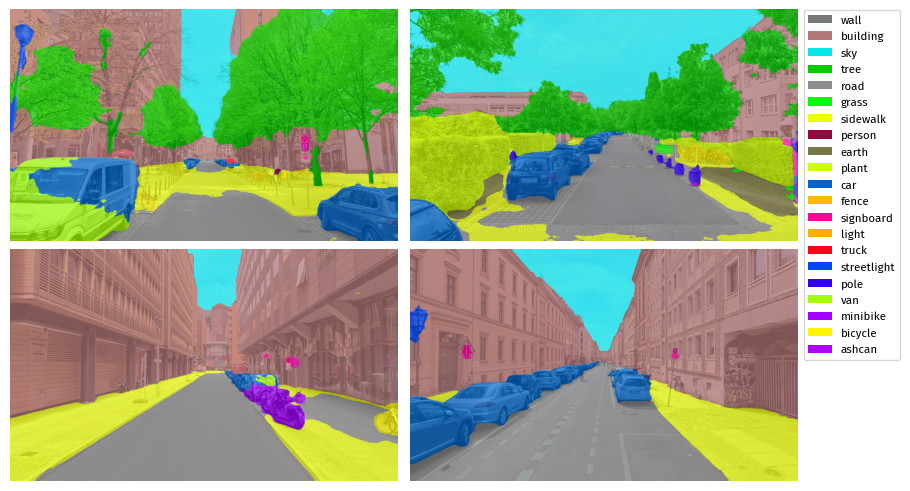

In [ ]:
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

images_for_figure = [item['blended_image'] for item in images_as_arrays[:4]]

# Create a 2x2 figure displaying the blended images
# Determine image size and create a 2x2 figure proportional to image pixel dimensions
nrows, ncols = 2, 2
img_w, img_h = images_for_figure[0].size  # width, height in pixels

figsize = (8, 4.8)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize)

for ax, img in zip(axes.flatten(), images_for_figure):
    ax.imshow(img)
    ax.axis('off')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)     

# Legend with class names and colors
legend_elements = [Patch(facecolor=np.array(color)/255, label=label) for label, color in unique_class_labels_and_colors]
rcParams['font.family'] = 'Fira Sans'
font = FontProperties(family='Fira Sans', size='small')

fig.legend(handles=legend_elements, loc=2, ncol=1, prop=font, bbox_to_anchor=(1, 0.99), borderaxespad=0.0)

fig.set_constrained_layout(True)


plt.show()


In [85]:
# inspect what matplotlib knows about Fira
import matplotlib.font_manager as fm
print(sorted({f.name for f in fm.fontManager.ttflist if 'Fira' in f.name}))

# show which file would be used for the requested family
from matplotlib.font_manager import findfont, FontProperties
print(findfont(FontProperties(family='Fira Sans')))

['Fira Sans', 'FiraCode Nerd Font', 'FiraCode Nerd Font Mono', 'FiraCode Nerd Font Propo']
/Users/schnuckiputz/Library/Fonts/FiraSans-Regular.ttf
